In [14]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve , roc_auc_score
import matplotlib.pyplot as plt 

In [15]:
x , y = make_classification(n_samples = 1000, n_classes=2, random_state=1)
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2)

In [16]:
# a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(ytest))]


In [17]:
model = LogisticRegression(solver='lbfgs')
model.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
# getting probability values for every prediction 

In [24]:
yprobs = model.predict_proba(xtest)

In [25]:
yprobs = yprobs[:,1] # keeping only the output 1 probability values , eliminating the 0's prob values 

In [33]:
ns_acc = roc_auc_score(ytest, ns_probs)
yprob_acc = roc_auc_score(ytest, yprobs)

In [62]:
print("No Skill ROC - AUC Score: ", ns_acc)
print("Logistic ROC - AUC Score: ", yprob_acc)

No Skill ROC - AUC Score:  0.5
Logistic ROC - AUC Score:  0.9119591346153847


In [35]:
# calcualting the roc curves -- getting the TP-rate FP-rate

In [61]:
ns_fpr , ns_tpr, _  = roc_curve(ytest, ns_probs)
yprob_fpr , yprob_tpr,_ = roc_curve(ytest, yprobs)

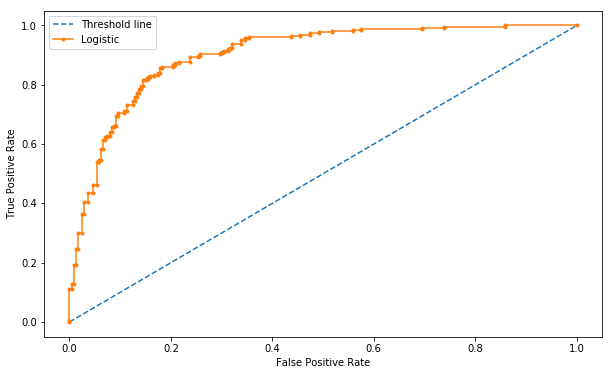

In [63]:
plt.figure(figsize=(10,6))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Threshold line')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [41]:
# Developing a ROC_AUC Curve Simple Pipeline : 

In [66]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

# Binary Classification Dataset :
dataset = pd.read_csv('data_files/Social_Network_Ads.csv')
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:,4].values
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)
# Any Random Classification Model :
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini')
model.fit(xtrain,ytrain)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [51]:
# the actual ROC_AUC Curve Pipeline


Threshold Boundary line roc-auc score:  0.5
Regressor model ROC - AUC score:  0.9119591346153847


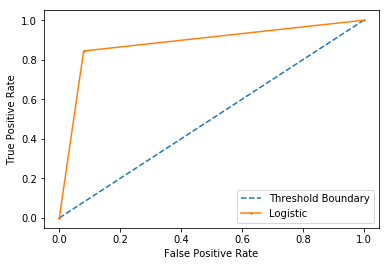

In [67]:
from sklearn.metrics import roc_auc_score , roc_curve
yprobs = model.predict_proba(xtest)
ns_probs = [0 for _ in range(len(ytest))]

yprobs = yprobs[:,1]
ns_acc = roc_auc_score(ytest, ns_probs)
yprobs_acc = roc_auc_score(ytest, yprobs)

print("Threshold Boundary line roc-auc score: ", ns_acc)
print("Regressor model ROC - AUC score: ", yprob_acc)

ns_fpr, ns_tpr,_ = roc_curve(ytest, ns_probs)
model_fpr, model_tpr,_ = roc_curve(ytest, yprobs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Threshold Boundary')
plt.plot(model_fpr, model_tpr, marker='', label='Logistic', markerfacecolor='red',markersize=3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()